# Proyecto final Statistical Learning I: Clasificador de supervivencia en el Titanic

### Juan Pablo Carranza Hurtado 20000607

**Instrucciones:** 

* El proyecto consiste en hacer clasificación binaria para determinar si una persona sobrevive ($y=1$) o no ($y=0$) del hundimiento del Titanic.

**Objetivos:**
* Realizar un análisis exploratorio de datos para el dataset del hundimiento del Titanic.
* Considerar el desarrollo de features adicionales a los ya contenidos dentro del data set
* Desarrollar un modelo de clasificación binaria que alcance un nivel de exactitud de al menos el 80%.


### Seccion I: Análisis exploratorio de dataset

A continuación se presenta un breve análisis descriptivo del dataset, a manera de encontrar ciertas características descriptivas del mismo, y así poder desarrollar features más robustos si así fuera necesario.

In [260]:
# Empezamos cargando las librerías a utilizar en el proyecto

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import OneHotEncoder, normalize, scale
import seaborn as sns

In [89]:
from sklearn.linear_model import LinearRegression

In [863]:
df = pd.read_csv("data_titanic_proyecto.csv")

df.info()

# Se puede ver que hay varios datos del dataframe que se encuentran faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Name                891 non-null    object 
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Ticket              891 non-null    object 
 6   Fare                891 non-null    float64
 7   Cabin               204 non-null    object 
 8   Embarked            889 non-null    object 
 9   passenger_class     891 non-null    object 
 10  passenger_sex       891 non-null    object 
 11  passenger_survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [864]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [865]:
df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


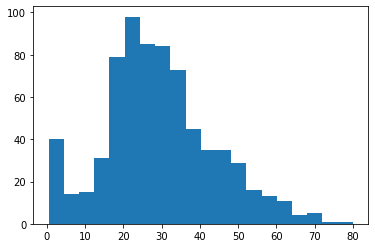

In [866]:
plt.hist(df['Age'], bins = 20)
plt.show()

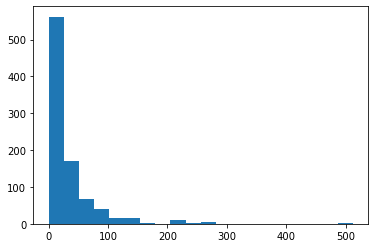

In [867]:
plt.hist((df['Fare']), bins = 20)
plt.show()

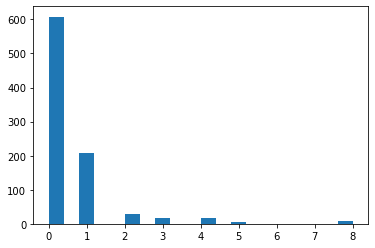

In [868]:
plt.hist((df['SibSp']), bins = 20)
plt.show()

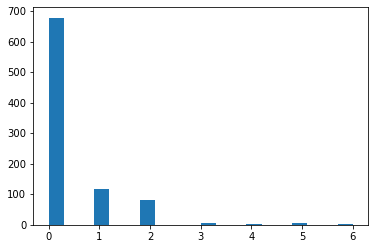

In [869]:
plt.hist((df['Parch']), bins = 20)
plt.show()

## Feature engineering

In [886]:
df = df.dropna(subset = ['Embarked'])

In [887]:
df['passenger_survived'] = df['passenger_survived'].replace('Y',1)
df['passenger_survived'] = df['passenger_survived'].replace('N',0)

df['passenger_survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: passenger_survived, dtype: int64

In [888]:
df['passenger_sex'] = df['passenger_sex'].replace('M',1)
df['passenger_sex'] = df['passenger_sex'].replace('F',0)

df['passenger_sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: passenger_sex, dtype: int64

In [889]:

onehot_class = np.array(df['passenger_class']).reshape(-1,1)


enc_train = OneHotEncoder(categories='auto')
enc_train.fit(onehot_class)
onehot_class = enc_train.transform(onehot_class).toarray()

In [890]:
df['Lower_class'], df['Middle_class'], df['Upper_class'] = [onehot_class.T[0], onehot_class.T[1], onehot_class.T[2]]

In [891]:

onehot_class = np.array(df['passenger_class']).reshape(-1,1)


enc_train = OneHotEncoder(categories='auto')
enc_train.fit(onehot_class)
onehotlabels_train = enc_train.transform(onehot_class).toarray()

In [892]:

onehot_embarked = np.array(df['Embarked']).reshape(-1,1)


enc_train = OneHotEncoder(categories='auto')
enc_train.fit(onehot_embarked)
onehot_embarked = enc_train.transform(onehot_embarked).toarray()

In [893]:
onehot_embarked.T

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [894]:
df['Embarked_C'], df['Embarked_Q'], df['Embarked_S'] = [onehot_embarked.T[0], onehot_embarked.T[1], onehot_embarked.T[2]]

In [895]:
df_trim = df.drop(columns = ['Embarked', 'passenger_class', 'Ticket', 'Name', 'Cabin', 'PassengerId'])

In [896]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 712 non-null    float64
 1   SibSp               889 non-null    int64  
 2   Parch               889 non-null    int64  
 3   Fare                889 non-null    float64
 4   passenger_sex       889 non-null    int64  
 5   passenger_survived  889 non-null    int64  
 6   Lower_class         889 non-null    float64
 7   Middle_class        889 non-null    float64
 8   Upper_class         889 non-null    float64
 9   Embarked_C          889 non-null    float64
 10  Embarked_Q          889 non-null    float64
 11  Embarked_S          889 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 90.3 KB


In [897]:
df_trim

,Age,SibSp,Parch,Fare,passenger_sex,passenger_survived,Lower_class,Middle_class,Upper_class,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1.0,0.0,0.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,0,1,0.0,0.0,1.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,0,1,1.0,0.0,0.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,0,1,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,1,0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,0.0,1.0,0.0,0.0,0.0,1.0
887,19.0,0,0,30.0000,0,1,0.0,0.0,1.0,0.0,0.0,1.0
888,NaN,1,2,23.4500,0,0,1.0,0.0,0.0,0.0,0.0,1.0
889,26.0,0,0,30.0000,1,1,0.0,0.0,1.0,1.0,0.0,0.0


In [885]:
# Replace Age NA's with results from linear regression model

#y = df_trim['passenger_survived']

#df_trim = df.drop(columns = ['passenger_survived'])


In [898]:
df_trim['Age'] = df_trim['Age'].replace({np.nan: 0})

In [899]:
df_trim[df_trim['Age']==0].drop(columns = 'Age')

,SibSp,Parch,Fare,passenger_sex,passenger_survived,Lower_class,Middle_class,Upper_class,Embarked_C,Embarked_Q,Embarked_S
5,0,0,8.4583,1,0,1.0,0.0,0.0,0.0,1.0,0.0
17,0,0,13.0000,1,1,0.0,1.0,0.0,0.0,0.0,1.0
19,0,0,7.2250,0,1,1.0,0.0,0.0,1.0,0.0,0.0
26,0,0,7.2250,1,0,1.0,0.0,0.0,1.0,0.0,0.0
28,0,0,7.8792,0,1,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
859,0,0,7.2292,1,0,1.0,0.0,0.0,1.0,0.0,0.0
863,8,2,69.5500,0,0,1.0,0.0,0.0,0.0,0.0,1.0
868,0,0,9.5000,1,0,1.0,0.0,0.0,0.0,0.0,1.0
878,0,0,7.8958,1,0,1.0,0.0,0.0,0.0,0.0,1.0


In [900]:
df_lr_age = df_trim[df_trim['Age'] != 0]

In [901]:
Age_lr = LinearRegression().fit(df_lr_age.drop(columns = ['Age']), df_lr_age['Age'])

# 
Age_lr.score(df_lr_age.drop(columns = ['Age']), df_lr_age['Age'])


0.27906493934572274

In [902]:
age_replace_0 = Age_lr.predict(df_trim[df_trim['Age']==0].drop(columns = 'Age'))

In [903]:
df_trim['Age'][df_trim['Age']==0] = age_replace_0

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [908]:
df_trim['FamilySize'] = df_trim['SibSp'] + df_trim['Parch']

In [910]:
df_trim

,Age,SibSp,Parch,Fare,passenger_sex,passenger_survived,Lower_class,Middle_class,Upper_class,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,22.000000,1,0,7.2500,1,0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,38.000000,1,0,71.2833,0,1,0.0,0.0,1.0,1.0,0.0,0.0,1
2,26.000000,0,0,7.9250,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0
3,35.000000,1,0,53.1000,0,1,0.0,0.0,1.0,0.0,0.0,1.0,1
4,35.000000,0,0,8.0500,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0
887,19.000000,0,0,30.0000,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0
888,24.049162,1,2,23.4500,0,0,1.0,0.0,0.0,0.0,0.0,1.0,3
889,26.000000,0,0,30.0000,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0


In [911]:
# Normalizar variables que no sean one hot encodings
df_trim[['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']] = normalize(df_trim[['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']]) 

In [912]:
x = df_trim.drop(columns = ['passenger_survived'])
x

,Age,SibSp,Parch,Fare,passenger_sex,Lower_class,Middle_class,Upper_class,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0.947992,0.043091,0.000000,0.312406,1,1.0,0.0,0.0,0.0,0.0,1.0,0.043091
1,0.470345,0.012377,0.000000,0.882309,0,0.0,0.0,1.0,1.0,0.0,0.0,0.012377
2,0.956551,0.000000,0.000000,0.291564,0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
3,0.550202,0.015720,0.000000,0.834735,0,0.0,0.0,1.0,0.0,0.0,1.0,0.015720
4,0.974555,0.000000,0.000000,0.224148,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.901002,0.000000,0.000000,0.433816,1,0.0,1.0,0.0,0.0,0.0,1.0,0.000000
887,0.535052,0.000000,0.000000,0.844819,0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000
888,0.711568,0.029588,0.059176,0.693840,0,1.0,0.0,0.0,0.0,0.0,1.0,0.088764
889,0.654931,0.000000,0.000000,0.755689,1,0.0,0.0,1.0,1.0,0.0,0.0,0.000000


 ## Split de datos en entrenamiento, validación y prueba

In [913]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import datetime
from tensorboard_logger import configure, log_value


In [914]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=109)


In [915]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20,random_state=109)

In [916]:
print("training set size: ", X_train.shape)
print("validation set size: ", X_val.shape)
print("test set size: ", X_test.shape)

training set size:  (568, 12)
validation set size:  (143, 12)
test set size:  (178, 12)


 ## Entrenamiento de arbol de decisión

In [917]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo de clasificación con un arbol de decisión
# default 

def train_DecisionTreeClassifier( max_depth = None, min_samples_split = 2, min_samples_leaf = 1):
    
    
    train_str = 'experiments/'+"DecsnTree"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_maxdepth=" + str(max_depth) \
    + "_minsamplesplit=" + str(min_samples_split) + "_minsampleleaf=" + str(min_samples_leaf)
     
    dirlog = tensorboard_logger.Logger(train_str)

    tree_model = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

    tree_model.fit(X_train, y_train)
    
    # train accuracy
    train_accuracy = tree_model.score(X_train, y_train)
    dirlog.log_value('train_accuracy', train_accuracy, 1)

    # test accuracy
    val_accuracy = tree_model.score(X_val, y_val)
    dirlog.log_value('val_accuracy', val_accuracy, 1)
    
    tree_predictions_val = tree_model.predict(X_val)
    
    print(classification_report(tree_predictions_val, y_val))
    
    print("***************************************************")
    print("training accuracy:", train_accuracy)
    print("val accuracy:", val_accuracy)
    print("***************************************************")
    
    return tree_model


In [918]:
# default

train_DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        88
           1       0.70      0.69      0.70        55

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.77      0.77      0.77       143

***************************************************
training accuracy: 0.9911971830985915
val accuracy: 0.7692307692307693
***************************************************


DecisionTreeClassifier()

In [919]:
train_DecisionTreeClassifier(max_depth = 10, min_samples_split = 2, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        91
           1       0.69      0.71      0.70        52

    accuracy                           0.78       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.78      0.78      0.78       143

***************************************************
training accuracy: 0.9436619718309859
val accuracy: 0.7762237762237763
***************************************************


DecisionTreeClassifier(max_depth=10)

In [920]:
train_DecisionTreeClassifier(max_depth = 5, min_samples_split = 2, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        96
           1       0.67      0.77      0.71        47

    accuracy                           0.80       143
   macro avg       0.77      0.79      0.78       143
weighted avg       0.81      0.80      0.80       143

***************************************************
training accuracy: 0.8626760563380281
val accuracy: 0.7972027972027972
***************************************************


DecisionTreeClassifier(max_depth=5)

In [921]:
train_DecisionTreeClassifier(max_depth = 3, min_samples_split = 2, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        92
           1       0.70      0.75      0.72        51

    accuracy                           0.80       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.80      0.80      0.80       143

***************************************************
training accuracy: 0.8257042253521126
val accuracy: 0.7972027972027972
***************************************************


DecisionTreeClassifier(max_depth=3)

In [922]:
train_DecisionTreeClassifier(max_depth = 3, min_samples_split = 3, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        92
           1       0.70      0.75      0.72        51

    accuracy                           0.80       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.80      0.80      0.80       143

***************************************************
training accuracy: 0.8257042253521126
val accuracy: 0.7972027972027972
***************************************************


DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [923]:
train_DecisionTreeClassifier(max_depth = 2, min_samples_split = 3, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        96
           1       0.65      0.74      0.69        47

    accuracy                           0.78       143
   macro avg       0.76      0.77      0.76       143
weighted avg       0.79      0.78      0.79       143

***************************************************
training accuracy: 0.7922535211267606
val accuracy: 0.7832167832167832
***************************************************


DecisionTreeClassifier(max_depth=2, min_samples_split=3)

In [924]:
train_DecisionTreeClassifier(max_depth = 3, min_samples_split = 2, min_samples_leaf = 2)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        93
           1       0.69      0.74      0.71        50

    accuracy                           0.79       143
   macro avg       0.77      0.78      0.77       143
weighted avg       0.79      0.79      0.79       143

***************************************************
training accuracy: 0.823943661971831
val accuracy: 0.7902097902097902
***************************************************


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [925]:
train_DecisionTreeClassifier(max_depth = 3, min_samples_split = 2, min_samples_leaf = 3)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        92
           1       0.70      0.75      0.72        51

    accuracy                           0.80       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.80      0.80      0.80       143

***************************************************
training accuracy: 0.823943661971831
val accuracy: 0.7972027972027972
***************************************************


DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [926]:
# best value for depth is 4 
train_DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.89      0.81      0.84        98
           1       0.65      0.78      0.71        45

    accuracy                           0.80       143
   macro avg       0.77      0.79      0.78       143
weighted avg       0.81      0.80      0.80       143

***************************************************
training accuracy: 0.8503521126760564
val accuracy: 0.7972027972027972
***************************************************


DecisionTreeClassifier(max_depth=4)

In [927]:
train_DecisionTreeClassifier(max_depth = 4, min_samples_split = 3, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.89      0.81      0.84        98
           1       0.65      0.78      0.71        45

    accuracy                           0.80       143
   macro avg       0.77      0.79      0.78       143
weighted avg       0.81      0.80      0.80       143

***************************************************
training accuracy: 0.8503521126760564
val accuracy: 0.7972027972027972
***************************************************


DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [928]:
train_DecisionTreeClassifier(max_depth = 4, min_samples_split = 5, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.89      0.81      0.84        98
           1       0.65      0.78      0.71        45

    accuracy                           0.80       143
   macro avg       0.77      0.79      0.78       143
weighted avg       0.81      0.80      0.80       143

***************************************************
training accuracy: 0.8503521126760564
val accuracy: 0.7972027972027972
***************************************************


DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [929]:
# There is no change in validation accuracy after setting max depth of tree to 4 and changing the other two values
train_DecisionTreeClassifier(max_depth = 10, min_samples_split = 2, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        98
           1       0.63      0.76      0.69        45

    accuracy                           0.78       143
   macro avg       0.75      0.78      0.76       143
weighted avg       0.80      0.78      0.79       143

***************************************************
training accuracy: 0.9383802816901409
val accuracy: 0.7832167832167832
***************************************************


DecisionTreeClassifier(max_depth=10)

In [930]:
train_DecisionTreeClassifier(max_depth = 10, min_samples_split = 2, min_samples_leaf = 2)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        99
           1       0.61      0.75      0.67        44

    accuracy                           0.78       143
   macro avg       0.74      0.77      0.75       143
weighted avg       0.79      0.78      0.78       143

***************************************************
training accuracy: 0.9066901408450704
val accuracy: 0.7762237762237763
***************************************************


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [931]:
train_DecisionTreeClassifier(max_depth = 10, min_samples_split = 3, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        96
           1       0.63      0.72      0.67        47

    accuracy                           0.77       143
   macro avg       0.74      0.76      0.75       143
weighted avg       0.78      0.77      0.77       143

***************************************************
training accuracy: 0.9348591549295775
val accuracy: 0.7692307692307693
***************************************************


DecisionTreeClassifier(max_depth=10, min_samples_split=3)

In [932]:
train_DecisionTreeClassifier(max_depth = 10, min_samples_split = 4, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        96
           1       0.67      0.77      0.71        47

    accuracy                           0.80       143
   macro avg       0.77      0.79      0.78       143
weighted avg       0.81      0.80      0.80       143

***************************************************
training accuracy: 0.926056338028169
val accuracy: 0.7972027972027972
***************************************************


DecisionTreeClassifier(max_depth=10, min_samples_split=4)

In [933]:
train_DecisionTreeClassifier(max_depth = 10, min_samples_split = 7, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        95
           1       0.67      0.75      0.71        48

    accuracy                           0.79       143
   macro avg       0.77      0.78      0.77       143
weighted avg       0.80      0.79      0.79       143

***************************************************
training accuracy: 0.9154929577464789
val accuracy: 0.7902097902097902
***************************************************


DecisionTreeClassifier(max_depth=10, min_samples_split=7)

In [934]:
train_DecisionTreeClassifier(max_depth = 10, min_samples_split = 8, min_samples_leaf = 1)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        94
           1       0.67      0.73      0.70        49

    accuracy                           0.78       143
   macro avg       0.76      0.77      0.76       143
weighted avg       0.79      0.78      0.79       143

***************************************************
training accuracy: 0.9154929577464789
val accuracy: 0.7832167832167832
***************************************************


DecisionTreeClassifier(max_depth=10, min_samples_split=8)

In [986]:
train_DecisionTreeClassifier(max_depth = None, min_samples_split = 3, min_samples_leaf = 15)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       101
           1       0.63      0.81      0.71        42

    accuracy                           0.80       143
   macro avg       0.77      0.81      0.78       143
weighted avg       0.83      0.80      0.81       143

***************************************************
training accuracy: 0.8415492957746479
val accuracy: 0.8041958041958042
***************************************************


DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=3)

In [1096]:
best_DecisionTree = train_DecisionTreeClassifier(max_depth = 4, min_samples_split = 3, min_samples_leaf = 15)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86       108
           1       0.57      0.89      0.70        35

    accuracy                           0.81       143
   macro avg       0.76      0.84      0.78       143
weighted avg       0.86      0.81      0.82       143

***************************************************
training accuracy: 0.8327464788732394
val accuracy: 0.8111888111888111
***************************************************


In [1099]:
from joblib import dump

In [1100]:
dump(best_DecisionTree, "train_DecisionTreeClassifier(max_depth = 4, min_samples_split = 3, min_samples_leaf = 15).joblib")

['train_DecisionTreeClassifier(max_depth = 4, min_samples_split = 3, min_samples_leaf = 15).joblib']

## Entrenar un modelo de support vector machine

In [997]:
from sklearn import svm

In [998]:

def train_SVMClassifier(C = 1.0, kernel = 'rbf'):
    
    
    train_str = 'experiments/'+"SVM_"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_C=" + str(C) + "_kernel=" + kernel 
     
    dirlog = tensorboard_logger.Logger(train_str)

    svm_model = svm.SVC(C=C, kernel=kernel)
    svm_model.fit(X_train, y_train)
    
    # train accuracy
    train_accuracy = svm_model.score(X_train, y_train)
    dirlog.log_value('train_accuracy', train_accuracy, 1)

    # test accuracy
    val_accuracy = svm_model.score(X_val, y_val)
    dirlog.log_value('val_accuracy', val_accuracy, 1)
    
    svm_predictions_val = svm_model.predict(X_val)
    
    print(classification_report(svm_predictions_val, y_val))
    print("***************************************************")
    print("training accuracy:", train_accuracy)
    print("val accuracy:", val_accuracy)
    print("***************************************************")
    
    return svm_model

In [999]:
train_SVMClassifier(C = 1.0, kernel = 'rbf')

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       111
           1       0.54      0.91      0.67        32

    accuracy                           0.80       143
   macro avg       0.75      0.84      0.77       143
weighted avg       0.87      0.80      0.82       143

***************************************************
training accuracy: 0.8151408450704225
val accuracy: 0.8041958041958042
***************************************************


SVC()

In [1000]:
train_SVMClassifier(C = 1.0, kernel = 'linear')

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        96
           1       0.65      0.74      0.69        47

    accuracy                           0.78       143
   macro avg       0.76      0.77      0.76       143
weighted avg       0.79      0.78      0.79       143

***************************************************
training accuracy: 0.7922535211267606
val accuracy: 0.7832167832167832
***************************************************


SVC(kernel='linear')

In [1001]:
train_SVMClassifier(C = 1.0, kernel = 'poly')

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       108
           1       0.54      0.83      0.65        35

    accuracy                           0.78       143
   macro avg       0.73      0.80      0.75       143
weighted avg       0.84      0.78      0.80       143

***************************************************
training accuracy: 0.8221830985915493
val accuracy: 0.7832167832167832
***************************************************


SVC(kernel='poly')

In [1002]:
train_SVMClassifier(C = 1.0, kernel = 'sigmoid')

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        92
           1       0.48      0.51      0.50        51

    accuracy                           0.63       143
   macro avg       0.60      0.60      0.60       143
weighted avg       0.63      0.63      0.63       143

***************************************************
training accuracy: 0.6373239436619719
val accuracy: 0.6293706293706294
***************************************************


SVC(kernel='sigmoid')

In [1003]:
train_SVMClassifier(C = 10.0, kernel = 'rbf')

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       107
           1       0.56      0.83      0.67        36

    accuracy                           0.79       143
   macro avg       0.74      0.80      0.76       143
weighted avg       0.84      0.79      0.80       143

***************************************************
training accuracy: 0.8274647887323944
val accuracy: 0.7902097902097902
***************************************************


SVC(C=10.0)

In [1004]:
train_SVMClassifier(C = 100.0, kernel = 'rbf')

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       110
           1       0.52      0.85      0.64        33

    accuracy                           0.78       143
   macro avg       0.73      0.81      0.74       143
weighted avg       0.85      0.78      0.80       143

***************************************************
training accuracy: 0.8433098591549296
val accuracy: 0.7832167832167832
***************************************************


SVC(C=100.0)

In [1005]:
train_SVMClassifier(C = 5.0, kernel = 'rbf')

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       108
           1       0.54      0.83      0.65        35

    accuracy                           0.78       143
   macro avg       0.73      0.80      0.75       143
weighted avg       0.84      0.78      0.80       143

***************************************************
training accuracy: 0.8221830985915493
val accuracy: 0.7832167832167832
***************************************************


SVC(C=5.0)

In [1006]:
train_SVMClassifier(C = 2.0, kernel = 'rbf')

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       109
           1       0.54      0.85      0.66        34

    accuracy                           0.79       143
   macro avg       0.74      0.81      0.75       143
weighted avg       0.85      0.79      0.80       143

***************************************************
training accuracy: 0.8257042253521126
val accuracy: 0.7902097902097902
***************************************************


SVC(C=2.0)

In [1101]:
best_SVMClassifier = train_SVMClassifier(C = 1, kernel = 'rbf')

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       111
           1       0.54      0.91      0.67        32

    accuracy                           0.80       143
   macro avg       0.75      0.84      0.77       143
weighted avg       0.87      0.80      0.82       143

***************************************************
training accuracy: 0.8151408450704225
val accuracy: 0.8041958041958042
***************************************************


In [1103]:
dump(best_SVMClassifier, "best_SVMClassifier = train_SVMClassifier(C = 1, kernel = 'rbf').joblib")

["best_SVMClassifier = train_SVMClassifier(C = 1, kernel = 'rbf').joblib"]

## Entrenamiento de modelo de Naive Bayes


In [1048]:
# First separate the dataset into two classes

x_train_0 = X_train[y_train == 0]
x_train_1 = X_train[y_train == 1]


#def NaiveBayes classifier

In [454]:
#x_train_0 = x_train_0.drop(columns = 'passenger_survived')
#x_train_1 = x_train_1.drop(columns = 'passenger_survived')

In [1049]:
print(np.mean(x_train_0))

print(np.std(x_train_0))

Age              0.813336
SibSp            0.013227
Parch            0.008158
Fare             0.456925
passenger_sex    0.846154
Lower_class      0.668639
Middle_class     0.177515
Upper_class      0.153846
Embarked_C       0.139053
Embarked_Q       0.076923
Embarked_S       0.784024
FamilySize       0.021386
dtype: float64
Age              0.249487
SibSp            0.028649
Parch            0.019791
Fare             0.252619
passenger_sex    0.360801
Lower_class      0.470703
Middle_class     0.382104
Upper_class      0.360801
Embarked_C       0.346002
Embarked_Q       0.266469
Embarked_S       0.411498
FamilySize       0.041619
dtype: float64


In [1050]:
mean_0 = np.array(np.mean(x_train_0))
sd_0 = np.array(np.std(x_train_0))

summary_0 = np.stack((mean_0,sd_0), axis = 0)

In [1051]:
print(np.mean(x_train_1))

print(np.std(x_train_1))

Age              0.613837
SibSp            0.012797
Parch            0.013650
Fare             0.674767
passenger_sex    0.286957
Lower_class      0.330435
Middle_class     0.282609
Upper_class      0.386957
Embarked_C       0.265217
Embarked_Q       0.095652
Embarked_S       0.639130
FamilySize       0.026446
dtype: float64
Age              0.307121
SibSp            0.024536
Parch            0.024950
Fare             0.263798
passenger_sex    0.452341
Lower_class      0.470370
Middle_class     0.450268
Upper_class      0.487054
Embarked_C       0.441449
Embarked_Q       0.294114
Embarked_S       0.480253
FamilySize       0.041317
dtype: float64


In [1052]:
mean_1 = np.array(np.mean(x_train_1))
sd_1 = np.array(np.std(x_train_1))

summary_1 = np.stack((mean_1,sd_1), axis = 0)

In [1053]:
summary_0 = summary_0.T
summary_1 = summary_1.T

In [1054]:

output_array_0 = []
output_array_1 = []

for i in range(0, summary_0.shape[0]):

    predictions_0 = norm(summary_0[i][0], summary_0[i][1]).cdf(X_train.iloc[:, [i]])
    predictions_1 = norm(summary_1[i][0], summary_1[i][1]).cdf(X_train.iloc[:, [i]])
    output_array_0.append(predictions_0)
    output_array_1.append(predictions_1)
    
x_0_probabilities = np.array(output_array_0).T.squeeze()
x_1_probabilities = np.array(output_array_1).T.squeeze()

In [1055]:
prob_class_0 = (1-np.mean(y_train))
prob_class_1 = np.mean(y_train)

In [1056]:
np.full_like(x_0_probabilities[:,0],prob_class_0).reshape(-1,1).shape

(568, 1)

In [1057]:
x_0 = np.concatenate((x_0_probabilities, np.full_like(x_0_probabilities[:,0],prob_class_0).reshape(-1,1)), axis = 1)

In [1058]:
x_1 = np.concatenate((x_1_probabilities, np.full_like(x_1_probabilities[:,0],prob_class_1).reshape(-1,1)), axis = 1)

In [1059]:
y_0 = np.prod(x_0, axis = 1).reshape(-1,1)
y_1 = np.prod(x_1, axis = 1).reshape(-1,1)

In [1060]:
y_0_1 = np.concatenate((y_0, y_1), axis = 1)

In [1061]:
predictions = np.argmax(y_0_1, axis = 1)

In [1062]:
accuracy = np.mean(predictions == y_train)

In [1063]:
accuracy

0.7517605633802817

In [1064]:
def train_NaiveBayesClassifier(X_train):
    
    string = "_"

    for i in X_train.columns:
        column = str(i) + "-"
    
        string += column
    
    train_str = 'experiments/'+"NaiveBayes_"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + string
     
    dirlog = tensorboard_logger.Logger(train_str)
    
    
    x_train_0 = X_train[y_train == 0]
    x_train_1 = X_train[y_train == 1]
    
    # Calcular media y sd para clase 0 
    mean_0 = np.array(np.mean(x_train_0))
    sd_0 = np.array(np.std(x_train_0))
    summary_0 = np.stack((mean_0,sd_0), axis = 0)
    
    # Calulcar media y sd para clase 1
    mean_1 = np.array(np.mean(x_train_1))
    sd_1 = np.array(np.std(x_train_1))
    summary_1 = np.stack((mean_1,sd_1), axis = 0)
    
    # Se calculan transpuestos
    summary_0 = summary_0.T
    summary_1 = summary_1.T
    
    output_array_0 = []
    output_array_1 = []

    for i in range(0, summary_0.shape[0]):

        predictions_0 = norm(summary_0[i][0], summary_0[i][1]).cdf(X_train.iloc[:, [i]])
        predictions_1 = norm(summary_1[i][0], summary_1[i][1]).cdf(X_train.iloc[:, [i]])
        output_array_0.append(predictions_0)
        output_array_1.append(predictions_1)
    
    x_0_probabilities = np.array(output_array_0).T.squeeze()
    x_1_probabilities = np.array(output_array_1).T.squeeze()
    
    prob_class_0 = (1-np.mean(y_train))
    prob_class_1 = np.mean(y_train)
    
    x_0 = np.concatenate((x_0_probabilities, np.full_like(x_0_probabilities[:,0],prob_class_0).reshape(-1,1)), axis = 1)
    x_1 = np.concatenate((x_1_probabilities, np.full_like(x_1_probabilities[:,0],prob_class_1).reshape(-1,1)), axis = 1)
    
    y_0 = np.prod(x_0, axis = 1).reshape(-1,1)
    y_1 = np.prod(x_1, axis = 1).reshape(-1,1)
    
    y_0_1 = np.concatenate((y_0, y_1), axis = 1)
    
    predictions = np.argmax(y_0_1, axis = 1)
    
    accuracy = np.mean(predictions == y_train)
    
    # Validation set
    
    output_array_0_val = []
    output_array_1_val = []

    for i in range(0, summary_0.shape[0]):

        predictions_0_val = norm(summary_0[i][0], summary_0[i][1]).cdf(X_val.iloc[:, [i]])
        predictions_1_val = norm(summary_1[i][0], summary_1[i][1]).cdf(X_val.iloc[:, [i]])
        output_array_0_val.append(predictions_0_val)
        output_array_1_val.append(predictions_1_val)
    
    x_0_probabilities_val = np.array(output_array_0_val).T.squeeze()
    x_1_probabilities_val = np.array(output_array_1_val).T.squeeze()
    
    x_0_val = np.concatenate((x_0_probabilities_val, np.full_like(x_0_probabilities_val[:,0],prob_class_0).reshape(-1,1)), axis = 1)
    x_1_val = np.concatenate((x_1_probabilities_val, np.full_like(x_1_probabilities_val[:,0],prob_class_1).reshape(-1,1)), axis = 1)
    
    y_0_val = np.prod(x_0_val, axis = 1).reshape(-1,1)
    y_1_val = np.prod(x_1_val, axis = 1).reshape(-1,1)
    
    y_0_1_val = np.concatenate((y_0_val, y_1_val), axis = 1)
    
    predictions_val = np.argmax(y_0_1_val, axis = 1)
    
    accuracy_val = np.mean(predictions_val == y_val)
    
    dirlog.log_value('train_accuracy', accuracy, 1)
    dirlog.log_value('val_accuracy', accuracy_val, 1)
    
    print(train_str)
    print(classification_report(predictions_val, y_val))
    print("***************************************************")
    print("training accuracy:", accuracy)
    print("validation accuracy:", accuracy_val)
    print("***************************************************")
    
    dictionary = {"likelihoods_0": summary_0, "likelihoods_1": summary_1}
    
    
    return dictionary , predictions

In [1065]:
_, _ = train_NaiveBayesClassifier(X_train)

experiments/NaiveBayes_20200629-174416_Age-SibSp-Parch-Fare-passenger_sex-Lower_class-Middle_class-Upper_class-Embarked_C-Embarked_Q-Embarked_S-FamilySize-
              precision    recall  f1-score   support

           0       0.65      0.91      0.76        64
           1       0.89      0.61      0.72        79

    accuracy                           0.74       143
   macro avg       0.77      0.76      0.74       143
weighted avg       0.78      0.74      0.74       143

***************************************************
training accuracy: 0.7517605633802817
validation accuracy: 0.7412587412587412
***************************************************


In [1066]:
_, _ = train_NaiveBayesClassifier(X_train.drop(columns = 'Age'))

experiments/NaiveBayes_20200629-174422_SibSp-Parch-Fare-passenger_sex-Lower_class-Middle_class-Upper_class-Embarked_C-Embarked_Q-Embarked_S-FamilySize-
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        83
           1       0.31      0.28      0.30        60

    accuracy                           0.44       143
   macro avg       0.42      0.42      0.42       143
weighted avg       0.43      0.44      0.44       143

***************************************************
training accuracy: 0.7711267605633803
validation accuracy: 0.4405594405594406
***************************************************


In [1067]:
for i in X_train.columns:
    _, _ = train_NaiveBayesClassifier(X_train.drop(columns = i))

experiments/NaiveBayes_20200629-174426_SibSp-Parch-Fare-passenger_sex-Lower_class-Middle_class-Upper_class-Embarked_C-Embarked_Q-Embarked_S-FamilySize-
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        83
           1       0.31      0.28      0.30        60

    accuracy                           0.44       143
   macro avg       0.42      0.42      0.42       143
weighted avg       0.43      0.44      0.44       143

***************************************************
training accuracy: 0.7711267605633803
validation accuracy: 0.4405594405594406
***************************************************
experiments/NaiveBayes_20200629-174426_Age-Parch-Fare-passenger_sex-Lower_class-Middle_class-Upper_class-Embarked_C-Embarked_Q-Embarked_S-FamilySize-
              precision    recall  f1-score   support

           0       0.29      0.72      0.42        36
           1       0.81      0.41      0.55       107

    accuracy             

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.69      0.80      0.74        76
           1       0.72      0.58      0.64        67

    accuracy                           0.70       143
   macro avg       0.70      0.69      0.69       143
weighted avg       0.70      0.70      0.69       143

***************************************************
training accuracy: 0.7059859154929577
validation accuracy: 0.6993006993006993
***************************************************
experiments/NaiveBayes_20200629-174426_Age-SibSp-Parch-Fare-passenger_sex-Middle_class-Upper_class-Embarked_C-Embarked_Q-Embarked_S-FamilySize-
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        66
           1       0.85      0.60      0.70        77

    accuracy                           0.73       143
   macro avg       0.75      0.74      0.73       143
weighted avg       0.76      0.73      0.72       143

********************

In [1068]:
best_naivebayes_0, _ = train_NaiveBayesClassifier(X_train.drop(columns = 'Embarked_S'))

experiments/NaiveBayes_20200629-174456_Age-SibSp-Parch-Fare-passenger_sex-Lower_class-Middle_class-Upper_class-Embarked_C-Embarked_Q-FamilySize-
              precision    recall  f1-score   support

           0       0.67      0.90      0.77        67
           1       0.87      0.62      0.72        76

    accuracy                           0.75       143
   macro avg       0.77      0.76      0.75       143
weighted avg       0.78      0.75      0.74       143

***************************************************
training accuracy: 0.75
validation accuracy: 0.7482517482517482
***************************************************


In [1069]:
for i in X_train.drop(columns = 'Embarked_S').columns:
    _, _ = train_NaiveBayesClassifier(X_train.drop(columns = ['Embarked_S',i]))

experiments/NaiveBayes_20200629-174459_SibSp-Parch-Fare-passenger_sex-Lower_class-Middle_class-Upper_class-Embarked_C-Embarked_Q-FamilySize-
              precision    recall  f1-score   support

           0       0.96      0.62      0.76       136
           1       0.06      0.43      0.10         7

    accuracy                           0.62       143
   macro avg       0.51      0.53      0.43       143
weighted avg       0.91      0.62      0.72       143

***************************************************
training accuracy: 0.7922535211267606
validation accuracy: 0.6153846153846154
***************************************************
experiments/NaiveBayes_20200629-174459_Age-Parch-Fare-passenger_sex-Lower_class-Middle_class-Upper_class-Embarked_C-Embarked_Q-FamilySize-
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       112
           1       0.35      0.61      0.45        31

    accuracy                           0.67    

In [1070]:
best_naivebayes_1, _ = train_NaiveBayesClassifier(X_train.drop(columns = ['Embarked_S', 'Lower_class']))

experiments/NaiveBayes_20200629-174526_Age-SibSp-Parch-Fare-passenger_sex-Middle_class-Upper_class-Embarked_C-Embarked_Q-FamilySize-
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        79
           1       0.78      0.66      0.71        64

    accuracy                           0.76       143
   macro avg       0.77      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

***************************************************
training accuracy: 0.7799295774647887
validation accuracy: 0.7622377622377622
***************************************************


In [1071]:
for i in X_train.drop(columns = ['Embarked_S', 'Lower_class']).columns:
    _, _ = train_NaiveBayesClassifier(X_train.drop(columns = ['Embarked_S', 'Lower_class',i]))

experiments/NaiveBayes_20200629-174531_SibSp-Parch-Fare-passenger_sex-Middle_class-Upper_class-Embarked_C-Embarked_Q-FamilySize-
              precision    recall  f1-score   support

           0       0.97      0.61      0.75       140
           1       0.00      0.00      0.00         3

    accuracy                           0.60       143
   macro avg       0.48      0.31      0.38       143
weighted avg       0.95      0.60      0.74       143

***************************************************
training accuracy: 0.7922535211267606
validation accuracy: 0.6013986013986014
***************************************************
experiments/NaiveBayes_20200629-174531_Age-Parch-Fare-passenger_sex-Middle_class-Upper_class-Embarked_C-Embarked_Q-FamilySize-
              precision    recall  f1-score   support

           0       0.91      0.63      0.75       128
           1       0.13      0.47      0.20        15

    accuracy                           0.62       143
   macro avg     

In [1072]:
best_naivebayes, _ = train_NaiveBayesClassifier(X_train.drop(columns = ['Embarked_S', 'Lower_class']))

experiments/NaiveBayes_20200629-174547_Age-SibSp-Parch-Fare-passenger_sex-Middle_class-Upper_class-Embarked_C-Embarked_Q-FamilySize-
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        79
           1       0.78      0.66      0.71        64

    accuracy                           0.76       143
   macro avg       0.77      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

***************************************************
training accuracy: 0.7799295774647887
validation accuracy: 0.7622377622377622
***************************************************


In [1105]:
dump(best_naivebayes, "train_NaiveBayesClassifier(X_train.drop(columns = ['Embarked_S', 'Lower_class'])).joblib")

["train_NaiveBayesClassifier(X_train.drop(columns = ['Embarked_S', 'Lower_class'])).joblib"]

## Entrenamiento de modelo de clasificación por medio de regresión logística

In [1073]:
y_train_reshaped = np.array(y_train).reshape(-1,1)
y_val_reshaped = np.array(y_val).reshape(-1,1)

In [1074]:
print(y_train_reshaped.shape)

print(y_val_reshaped.shape)

(568, 1)
(143, 1)


In [1075]:
X_train_reshaped = np.insert(np.array(X_train),0, np.ones(len(X_train)), axis = 1)

In [1076]:
X_val_reshaped = np.insert(np.array(X_val),0, np.ones(len(X_val)), axis = 1)

In [1077]:
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)

(568, 13)
(143, 13)


In [1078]:
class LogisticRegressionSigmoid:
    def __init__(self, x,  lambda_parameter, regularization):
        # vector de weights para logits
        self.w = tf.get_variable("weights", dtype = tf.float32, shape = [1,x.shape[1]], initializer = tf.zeros_initializer())
        self.lambda_parameter = tf.constant(lambda_parameter, dtype = tf.float32)
        self.regularization = regularization
    # Funcion para el calculo de logits
    def logits(self, x):
        with tf.name_scope("logits"):
            return tf.matmul(x, tf.transpose(self.w))
 
    def prediction(self, x):
        #Method to produce probability distribution for output
        sigmoid = tf.nn.sigmoid(self.logits(x))
        predictions = tf.round(sigmoid)
        return predictions
    
    def accuracy(self, y_hat, y):
        with tf.name_scope("accuracy"):
            accuracy = tf.equal(y_hat, y)
            accuracy = tf.cast(accuracy, tf.int32)
            accuracy = tf.divide(tf.reduce_sum(accuracy), tf.shape(y)[0])
            return accuracy 
    
    def loss(self, x, y):
        cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = self.logits(x)))
        if self.regularization == 'lasso':
            error = tf.add(cross_entropy,tf.multiply(self.lambda_parameter, tf.reduce_sum(tf.abs(self.w))))
        if self.regularization == 'ridge':
            error = tf.add(cross_entropy, tf.multiply(self.lambda_parameter, tf.sqrt(tf.reduce_sum(tf.square(self.w)))))
        return error
    
    def update(self, x_train, y_train, x_test, y_test, learningrate):
        with tf.name_scope("error"):
            train_error = self.loss(x_train, y_train)
            train_error_summary = tf.summary.scalar("TrainError", train_error)
            test_error = self.loss(x_test, y_test)
            test_error_summary = tf.summary.scalar("ValError", test_error)
        with tf.name_scope("accuracy"):
            train_accuracy = self.accuracy(self.prediction(x_train), y_train)
            train_accuracy_summary = tf.summary.scalar("TrainAccuracy", train_accuracy)
            test_accuracy = self.accuracy(self.prediction(x_test), y_test)
            test_accuracy_summary = tf.summary.scalar("ValAccuracy", test_accuracy)
        # update parameters via gradient descent
        gradient = tf.gradients(train_error, [self.w])
        updated_w = tf.assign(self.w, self.w - learningrate * gradient[0])
        
        #return updated_w, train_error, train_accuracy
        
        return updated_w, train_error, test_error, train_accuracy, test_accuracy, train_error_summary, \
        test_error_summary, train_accuracy_summary, test_accuracy_summary

In [1079]:
def train_LogisticRegressionClass(lr, epochs, frecprint, x_train, x_test, labels_train, labels_test, batch_size, lambda_parameter, regularization):
    # String para definicion de experimento
    string = './experiments/LogRegression'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +"_lr="+str(lr)+ "_epochs="+str(epochs) + "_batchsize=" \
    + str(batch_size) + '_lambda_parameters=' + str(lambda_parameter) + "_regularization=" + regularization

    g = tf.Graph()
    with g.as_default():
        # Inicialización de objeto de clase LogisticRegressionSoftmax
        modelo = LogisticRegressionSigmoid(x_train, lambda_parameter, regularization)
        # Definicion de placeholders para input de data a grafo
        with tf.name_scope("train_tensors"):
            tensor_x_train = tf.placeholder(tf.float32, [None,x_train.shape[1]], "tensor_x_train")
            tensor_labels_train = tf.placeholder(tf.float32, [None,labels_train.shape[1]], "tensor_labels_train")
        with tf.name_scope("val_tensors"):
            tensor_x_test = tf.placeholder(tf.float32, [x_test.shape[0], x_test.shape[1]], "tensor_x_val")
            tensor_labels_test = tf.placeholder(tf.float32, [labels_test.shape[0], labels_test.shape[1]], "tensor_labels_val")
        # Utilizacion de método update para hacer el entrenamiento
        update_parameters = modelo.update(tensor_x_train, tensor_labels_train, tensor_x_test, tensor_labels_test, lr)
    
        # Writer para utilizacion de tensorboard
        writer = tf.summary.FileWriter(string, g)
        
        #batch_size = 32
        
        total_steps = int((labels_train.shape[0] / batch_size) * epochs)  
        
        with tf.train.MonitoredSession() as session:
            
            for i in range(total_steps + 1):
                # Mini batch gradient descent with batch size 32
                offset = (i * batch_size) % (labels_train.shape[0] - batch_size)
                batch_data = x_train[offset:(offset + batch_size),]
                batch_labels = labels_train[offset:(offset + batch_size),]
                feed_dict = {tensor_x_train:batch_data, tensor_labels_train:batch_labels,tensor_x_test:x_test, tensor_labels_test:labels_test}
                # Entrenamiento
                training = session.run(update_parameters, feed_dict = feed_dict)
                if (i)%frecprint == 0:
                    # Cálculo de pesos para print por cada frecprint epocas
                    weights = session.run(modelo.w, feed_dict = feed_dict)
                    # Agregar datos a writer para poder visualizarlos en tensorboard
                    writer.add_summary(training[5], i)
                    writer.add_summary(training[6], i)
                    writer.add_summary(training[7], i)
                    writer.add_summary(training[8], i)
                    print("Mini-batch:", i, "train error:", training[1], "train accuracy:", training[3])
                    print("Epoch:", int(i//(labels_train.shape[0] / batch_size)+1), "validation error:", training[2], "validation accuracy:", training[4])
                    print("-------------------------------------------------------------------------")
            
            return weights

            writer.close()

In [1080]:
train_LogisticRegressionClass(0.01, 1000, 1000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 1000 train error: 0.54753935 train accuracy: 0.75
Epoch: 57 validation error: 0.53599375 validation accuracy: 0.7622377622377622
-------------------------------------------------------------------------
Mini-batch: 2000 train error: 0.40252542 train accuracy: 0.90625
Epoch: 113 validation error: 0.50421053 validation accuracy: 0.7692307692307693
-------------------------------------------------------------------------
Mini-batch: 3000 train error: 0.495663 train accuracy: 0.8125
Epoch: 170 validation error: 0.49150023 validation accuracy: 0.7762237762237763
-------------------------------------------------------------------------
Mini-batch: 4000 t

array([[ 0.6318657 , -0.21131779, -0.08487398,  0.0201401 ,  1.1315607 ,
        -2.539217  , -0.6654208 ,  0.5808353 ,  0.7164418 ,  0.4188391 ,
         0.4438626 , -0.2308401 , -0.06473403]], dtype=float32)

In [1081]:
train_LogisticRegressionClass(0.001, 1000, 1000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 16, 0, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.625
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 1000 train error: 0.626705 train accuracy: 0.625
Epoch: 29 validation error: 0.63727266 validation accuracy: 0.6363636363636364
-------------------------------------------------------------------------
Mini-batch: 2000 train error: 0.64811116 train accuracy: 0.5
Epoch: 57 validation error: 0.61222124 validation accuracy: 0.6643356643356644
-------------------------------------------------------------------------
Mini-batch: 3000 train error: 0.5847775 train accuracy: 0.75
Epoch: 85 validation error: 0.595854 validation accuracy: 0.6993006993006993
-------------------------------------------------------------------------
Mini-batch: 4000 train error: 

array([[ 0.4192092 , -0.23847876, -0.00450091,  0.02429908,  0.84232897,
        -1.8480964 , -0.5851744 ,  0.42366657,  0.5807162 ,  0.3463402 ,
         0.2269336 , -0.15406743,  0.01979819]], dtype=float32)

In [1082]:
train_LogisticRegressionClass(0.01, 1000, 1000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.5, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 1000 train error: 0.7114601 train accuracy: 0.5
Epoch: 57 validation error: 0.71078503 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 2000 train error: 0.70946056 train accuracy: 0.28125
Epoch: 113 validation error: 0.70918983 validation accuracy: 0.3776223776223776
-------------------------------------------------------------------------
Mini-batch: 3000 train error: 0.7099527 train accuracy: 0.75
Epoch: 170 validation error: 0.71035856 validation accuracy: 0.6013986013986014
-------------------------------------------------------------------------
Mini-batch: 4000 trai

array([[ 0.00248168, -0.00414554,  0.00104859, -0.00281456,  0.00240824,
        -0.00192894,  0.00034933,  0.00100538,  0.00112696, -0.00391986,
         0.0006021 , -0.00420061, -0.00176592]], dtype=float32)

In [1093]:
train_LogisticRegressionClass(0.01, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.05, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.63419414 train accuracy: 0.8125
Epoch: 564 validation error: 0.62031156 validation accuracy: 0.7832167832167832
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.6270167 train accuracy: 0.84375
Epoch: 1127 validation error: 0.62023664 validation accuracy: 0.7832167832167832
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.65765095 train accuracy: 0.78125
Epoch: 1691 validation error: 0.62030035 validation accuracy: 0.7832167832167832
-------------------------------------------------------------------------
Mini-bat

array([[ 1.3031161e-03,  2.5631825e-04, -4.7216966e-04, -3.7547442e-04,
         2.7376649e-01, -1.1667926e+00, -1.6715879e-03,  2.9055349e-04,
         1.0168247e-01,  3.0991359e-04, -5.7584140e-05,  5.0183473e-05,
         1.5232741e-04]], dtype=float32)

In [803]:
train_LogisticRegressionClass(0.01, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.10, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.69143695 train accuracy: 0.46875
Epoch: 564 validation error: 0.66187 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.68799144 train accuracy: 0.53125
Epoch: 1127 validation error: 0.661705 validation accuracy: 0.6853146853146853
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.70484453 train accuracy: 0.5625
Epoch: 1691 validation error: 0.66192603 validation accuracy: 0.6573426573426573
-------------------------------------------------------------------------
Mini-batch: 

array([[ 3.2615045e-04,  5.5437599e-04,  2.1742756e-04, -9.1216725e-04,
         1.7285575e-03, -6.2682426e-01, -5.6352117e-04,  1.0018909e-03,
        -1.1235307e-04, -1.5959772e-04,  9.6550799e-04, -4.8006937e-04]],
      dtype=float32)

In [805]:
train_LogisticRegressionClass(0.001, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.15, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.69820535 train accuracy: 0.46875
Epoch: 564 validation error: 0.685671 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.6995133 train accuracy: 0.4375
Epoch: 1127 validation error: 0.6851195 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.70805806 train accuracy: 0.4375
Epoch: 1691 validation error: 0.6850833 validation accuracy: 0.6293706293706294
-------------------------------------------------------------------------
Mini-batch: 4

array([[-7.5376811e-05, -1.2783270e-04, -9.8008211e-05, -8.7970926e-05,
        -4.7119807e-05, -2.8295344e-01, -1.6459129e-04,  1.0282995e-04,
        -1.3599165e-05,  1.4506970e-04, -9.3582494e-05, -1.2685664e-04]],
      dtype=float32)

In [1084]:
train_LogisticRegressionClass(0.001, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.025, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.61049074 train accuracy: 0.78125
Epoch: 564 validation error: 0.59980613 validation accuracy: 0.7622377622377622
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.5842234 train accuracy: 0.8125
Epoch: 1127 validation error: 0.5845672 validation accuracy: 0.7552447552447552
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.5993855 train accuracy: 0.75
Epoch: 1691 validation error: 0.5786192 validation accuracy: 0.7622377622377622
-------------------------------------------------------------------------
Mini-batch: 40

array([[ 1.11843372e-04,  4.34593167e-05,  1.47259962e-05,
         2.27833862e-05,  9.67495382e-01, -1.63878834e+00,
        -2.63410360e-01,  1.64516037e-04,  2.67798632e-01,
         2.82660403e-06,  5.84751688e-05,  5.08945086e-05,
        -1.24914295e-05]], dtype=float32)

In [1087]:
train_LogisticRegressionClass(0.001, 50000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 128, 0.01, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.5625
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.55969244 train accuracy: 0.765625
Epoch: 2254 validation error: 0.5656741 validation accuracy: 0.7622377622377622
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.54236937 train accuracy: 0.75
Epoch: 4508 validation error: 0.5423501 validation accuracy: 0.7552447552447552
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.51115394 train accuracy: 0.8046875
Epoch: 6761 validation error: 0.5330059 validation accuracy: 0.7552447552447552
-------------------------------------------------------------------------
Mini-batc

array([[ 1.7507602e-01,  4.2668566e-05, -3.7082891e-06, -6.9016023e-06,
         1.2593375e+00, -2.1379015e+00, -4.5445248e-01,  6.6015027e-02,
         4.9396518e-01,  2.8508234e-01,  4.5223642e-05, -9.5547829e-03,
         9.3874987e-06]], dtype=float32)

In [1091]:
train_LogisticRegressionClass(0.01, 40000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.0025, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.42260242 train accuracy: 0.8125
Epoch: 564 validation error: 0.49632093 validation accuracy: 0.7762237762237763
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.41193783 train accuracy: 0.84375
Epoch: 1127 validation error: 0.49598467 validation accuracy: 0.7692307692307693
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.46685073 train accuracy: 0.8125
Epoch: 1691 validation error: 0.495358 validation accuracy: 0.7762237762237763
-------------------------------------------------------------------------
Mini-batch

Mini-batch: 370000 train error: 0.55789244 train accuracy: 0.6875
Epoch: 20846 validation error: 0.4944686 validation accuracy: 0.7762237762237763
-------------------------------------------------------------------------
Mini-batch: 380000 train error: 0.5081684 train accuracy: 0.71875
Epoch: 21409 validation error: 0.49445775 validation accuracy: 0.7762237762237763
-------------------------------------------------------------------------
Mini-batch: 390000 train error: 0.49745753 train accuracy: 0.75
Epoch: 21972 validation error: 0.49446535 validation accuracy: 0.7762237762237763
-------------------------------------------------------------------------
Mini-batch: 400000 train error: 0.3220262 train accuracy: 0.875
Epoch: 22536 validation error: 0.4944548 validation accuracy: 0.7762237762237763
-------------------------------------------------------------------------
Mini-batch: 410000 train error: 0.36770183 train accuracy: 0.8125
Epoch: 23099 validation error: 0.49445623 validation

array([[ 3.7177286e-01,  1.2413695e-04,  1.8896129e-05, -2.5997811e-05,
         1.3406110e+00, -2.4139051e+00, -6.5222180e-01,  4.2063168e-01,
         5.8265001e-01,  3.1004980e-01,  2.5262913e-01, -2.1087341e-01,
        -5.7266876e-05]], dtype=float32)

In [809]:
train_LogisticRegressionClass(0.0001, 20000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.025, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.6810852 train accuracy: 0.46875
Epoch: 564 validation error: 0.65584797 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.67854273 train accuracy: 0.46875
Epoch: 1127 validation error: 0.6400608 validation accuracy: 0.6363636363636364
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.6763878 train accuracy: 0.5625
Epoch: 1691 validation error: 0.63012636 validation accuracy: 0.6503496503496503
-------------------------------------------------------------------------
Mini-batch

array([[ 4.5281511e-02, -2.6621169e-06, -7.4464674e-07,  2.4248145e-06,
         5.8618551e-01, -1.3700206e+00, -3.1256443e-01, -3.9504152e-06,
         3.2564387e-01,  8.6742146e-03,  1.6644935e-06, -4.3941964e-06]],
      dtype=float32)

In [810]:
%load_ext tensorboard


In [815]:
train_LogisticRegressionClass(0.001, 50000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.0025, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.6810852 train accuracy: 0.46875
Epoch: 564 validation error: 0.65584797 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.67854273 train accuracy: 0.46875
Epoch: 1127 validation error: 0.6400608 validation accuracy: 0.6363636363636364
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.6763878 train accuracy: 0.5625
Epoch: 1691 validation error: 0.63012636 validation accuracy: 0.6503496503496503
-------------------------------------------------------------------------
Mini-batch

Mini-batch: 370000 train error: 0.65271074 train accuracy: 0.625
Epoch: 20846 validation error: 0.57633597 validation accuracy: 0.7482517482517482
-------------------------------------------------------------------------
Mini-batch: 380000 train error: 0.6129717 train accuracy: 0.6875
Epoch: 21409 validation error: 0.5760831 validation accuracy: 0.7482517482517482
-------------------------------------------------------------------------
Mini-batch: 390000 train error: 0.59484786 train accuracy: 0.71875
Epoch: 21972 validation error: 0.57584363 validation accuracy: 0.7482517482517482
-------------------------------------------------------------------------
Mini-batch: 400000 train error: 0.47199434 train accuracy: 0.84375
Epoch: 22536 validation error: 0.57562375 validation accuracy: 0.7412587412587412
-------------------------------------------------------------------------
Mini-batch: 410000 train error: 0.49664268 train accuracy: 0.8125
Epoch: 23099 validation error: 0.5754177 valida

Mini-batch: 750000 train error: 0.48706287 train accuracy: 0.84375
Epoch: 42254 validation error: 0.5717226 validation accuracy: 0.7622377622377622
-------------------------------------------------------------------------
Mini-batch: 760000 train error: 0.60521495 train accuracy: 0.71875
Epoch: 42817 validation error: 0.57168406 validation accuracy: 0.7622377622377622
-------------------------------------------------------------------------
Mini-batch: 770000 train error: 0.5889186 train accuracy: 0.71875
Epoch: 43381 validation error: 0.5716504 validation accuracy: 0.7692307692307693
-------------------------------------------------------------------------
Mini-batch: 780000 train error: 0.5810268 train accuracy: 0.78125
Epoch: 43944 validation error: 0.5716218 validation accuracy: 0.7832167832167832
-------------------------------------------------------------------------
Mini-batch: 790000 train error: 0.6444037 train accuracy: 0.75
Epoch: 44508 validation error: 0.5715962 validatio

array([[ 1.9243649e-05,  3.7076318e-06, -1.8483811e-06, -1.3359603e-06,
         8.7260640e-01, -1.6032484e+00, -2.4372065e-01,  1.2697213e-05,
         3.2922214e-01,  4.7841318e-06, -9.8300234e-07,  9.2753762e-06]],
      dtype=float32)

In [1092]:
train_LogisticRegressionClass(0.001, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.00000000000000000000000000000000000001 , 'ridge')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.52125597 train accuracy: 0.8125
Epoch: 564 validation error: 0.536085 validation accuracy: 0.7622377622377622
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.46394473 train accuracy: 0.8125
Epoch: 1127 validation error: 0.504232 validation accuracy: 0.7692307692307693
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.4734108 train accuracy: 0.75
Epoch: 1691 validation error: 0.49147406 validation accuracy: 0.7762237762237763
-------------------------------------------------------------------------
Mini-batch: 4000

array([[ 0.63286036, -0.21098177, -0.08492222,  0.02014267,  1.1322442 ,
        -2.5382073 , -0.6648307 ,  0.5808273 ,  0.71688837,  0.4184005 ,
         0.44417584, -0.22972691, -0.06477563]], dtype=float32)

In [843]:
train_LogisticRegressionClass(0.01, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.00000000000000000000000000000000000001 , 'ridge')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.40180993 train accuracy: 0.8125
Epoch: 564 validation error: 0.48159444 validation accuracy: 0.7692307692307693
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.3892909 train accuracy: 0.84375
Epoch: 1127 validation error: 0.48228294 validation accuracy: 0.7622377622377622
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.44570336 train accuracy: 0.8125
Epoch: 1691 validation error: 0.4823023 validation accuracy: 0.7692307692307693
-------------------------------------------------------------------------
Mini-batch

array([[ 0.62094843, -0.20459764, -1.0272313 , -0.12553796,  1.205409  ,
        -2.553037  , -0.66373116,  0.5837145 ,  0.7009559 ,  0.3992751 ,
         0.46149853, -0.2398311 ]], dtype=float32)

In [1095]:
best_LogisticRegressionClass = train_LogisticRegressionClass(0.01, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.05, 'lasso')

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mini-batch: 0 train error: 0.6931472 train accuracy: 0.53125
Epoch: 1 validation error: 0.6931472 validation accuracy: 0.6223776223776224
-------------------------------------------------------------------------
Mini-batch: 10000 train error: 0.63419414 train accuracy: 0.8125
Epoch: 564 validation error: 0.62031156 validation accuracy: 0.7832167832167832
-------------------------------------------------------------------------
Mini-batch: 20000 train error: 0.6270167 train accuracy: 0.84375
Epoch: 1127 validation error: 0.62023664 validation accuracy: 0.7832167832167832
-------------------------------------------------------------------------
Mini-batch: 30000 train error: 0.65765095 train accuracy: 0.78125
Epoch: 1691 validation error: 0.62030035 validation accuracy: 0.7832167832167832
-------------------------------------------------------------------------
Mini-bat

In [1106]:
dump(best_LogisticRegressionClass, "train_LogisticRegressionClass(0.01, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.05, 'lasso').joblib")

["train_LogisticRegressionClass(0.01, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.05, 'lasso').joblib"]

## K Folds cross validation

El método de validación cruzada por medio de K Folds es un método utilizado para evaluar el rendimiento de un modelo antes de hacer las pruebas de en datos específicos de prueba. En otras palabras, es una manera de hacer la validación de nuestro modelo antes de ponerlo realmente a prueba. 

El algoritmo de K folds consiste en lo siguiente:

* Hacer una reorganización aleatoria de todos los datos del dataset
* Se divide el dataset en k diferentes grupos
* Para cada uno de los grupos específicos se debe:
    - Tomar el grupo como un grupo de validación
    - Tomar todos los demás grupos como el dataset de entrenamiento
    - Entrenar el modelo en este dataset de entrenamiento y evaluarlo en contra del grupo de validación
    - Se guarda la métrica de evaluación y se descarta el modelo
* Se calcula un promedio de todas las métricas de evaluación de todos los modelos generados durante el procedimiento

Existen tres tácticas comunes para elegir el tamaño de los k grupos en los que se deben de dividir el dataset completo.

* K representativo: El valor de K es escogido tal que cada grupo de entrenamiento/validación sea estadísticamente representativo del dataset completo.
* k = 10: A través de experimentación se ha visto que este valor de K tiende a dar buenas estimación del rendimiento del modelo.
* K = n: El valor de K se ajusta al tamaño total de la muestra a manera de que cada dato individual sea utilizado como un grupo de validación.

Se considera que la técnica de K folds tiende a dar buenas estimaciones, y en muchas ocasiones mejores, que realizar un split tradicional de train/test. Sin embargo, esta técnica tiende a ser computacionalmente costosa por lo que a veces, en datasets muy grandes, o en modelos muy complejos de entrenar, se vuelve una estrategia poco viable. 

Otro uso que tiene el K folds es en datasets pequeños en los que sería poco conveniente realizar un entrenamiento con un número de datos pequeño, pero que a la vez represnte un porcentaje elevado del dataset completo.

**Algunos de los usos que se le podría haber dado a K folds cross validation en este proyecto son:**

* Como una mejor estimación del rendimiento de los modelos en datos desconocidos.
* Como una manera de verificar el paso de validación de hiperparámetros a manera de tener estimaciones más certeras de realmente cuáles son los mejores valores para estos, o cuál de las iteraciones del grid search es el que mejor resultados proporciona.


## Pruebas con test set

In [1159]:
predictions_DT = best_DecisionTree.predict(X_test)

In [1158]:
predictions_SVM = best_SVMClassifier.predict(X_test)

In [1125]:

def predict_NaiveBayes(summary_0, summary_1):
    output_array_0 = []
    output_array_1 = []

    for i in range(0, summary_0.shape[0]):

        predictions_0 = norm(summary_0[i][0], summary_0[i][1]).cdf(X_test.iloc[:, [i]])
        predictions_1 = norm(summary_1[i][0], summary_1[i][1]).cdf(X_test.iloc[:, [i]])
        output_array_0.append(predictions_0)
        output_array_1.append(predictions_1)
    
    x_0_probabilities = np.array(output_array_0).T.squeeze()
    x_1_probabilities = np.array(output_array_1).T.squeeze()
    
    x_0 = np.concatenate((x_0_probabilities, np.full_like(x_0_probabilities[:,0],prob_class_0).reshape(-1,1)), axis = 1)
    x_1 = np.concatenate((x_1_probabilities, np.full_like(x_1_probabilities[:,0],prob_class_1).reshape(-1,1)), axis = 1)
    
    y_0 = np.prod(x_0, axis = 1).reshape(-1,1)
    y_1 = np.prod(x_1, axis = 1).reshape(-1,1)
    
    y_0_1 = np.concatenate((y_0, y_1), axis = 1)
    
    predictions = np.argmax(y_0_1, axis = 1)
    
    accuracy = np.mean(predictions == y_test)
    
    return predictions, accuracy

In [1162]:
predictions_NB, _ = predict_NaiveBayes(best_naivebayes['likelihoods_0'],best_naivebayes['likelihoods_1'])

In [1132]:
X_test_reshaped = np.insert(np.array(X_test),0, np.ones(len(X_test)), axis = 1)

In [1154]:
def predict_LogisticRegression(X_test, weights):
    
    tf.reset_default_graph()
    
    tensor_w = tf.placeholder(tf.float32, shape = [None, None], name = "tensor_w")
    tensor_x = tf.placeholder(tf.float32, shape = [None, None], name = "tensor_x")
    
    logits = tf.matmul(tensor_x, tf.transpose(tensor_w))
    sigmoid = tf.nn.sigmoid(logits)
    prediction = tf.round(sigmoid)
    
    with tf.train.MonitoredSession() as session:
        feed_dictionary = {tensor_x: X_test, tensor_w:weights}
        
        predictions = session.run(prediction, feed_dict= feed_dictionary)
        
        return predictions.T

In [1156]:
predictions_lr = predict_LogisticRegression(X_test_reshaped, best_LogisticRegressionClass)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [1164]:
print(predictions_DT.shape)
print(predictions_SVM.shape)
print(predictions_NB.shape)
print(predictions_lr.shape)


(178,)
(178,)
(178,)
(1, 178)


In [1167]:
predictions_lr = predictions_lr.squeeze()

In [1168]:
print(predictions_DT.shape)
print(predictions_SVM.shape)
print(predictions_NB.shape)
print(predictions_lr.shape)

(178,)
(178,)
(178,)
(178,)


In [1173]:
all_predictions = np.stack((predictions_DT, predictions_SVM, predictions_NB, predictions_lr)).T

In [1180]:
final_predictions =  scipy.stats.mode(all_predictions.T)[0].squeeze()

In [1189]:
X_test['passenger_survived'] = y_test

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1190]:
X_test['survived_predictions'] = final_predictions

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1193]:
final_df = X_test

In [1195]:
final_df

,Age,SibSp,Parch,Fare,passenger_sex,Lower_class,Middle_class,Upper_class,Embarked_C,Embarked_Q,Embarked_S,FamilySize,passenger_survived,survived_predictions
630,0.936329,0.0,0.000000,0.351123,1,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,1,0.0
640,0.930798,0.0,0.000000,0.365534,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0,0.0
848,0.646632,0.0,0.023094,0.762102,1,0.0,1.0,0.0,0.0,0.0,1.0,0.023094,0,0.0
648,0.968959,0.0,0.000000,0.247221,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0,0.0
381,0.062402,0.0,0.124805,0.982320,0,1.0,0.0,0.0,1.0,0.0,0.0,0.124805,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.941217,0.0,0.000000,0.337803,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0,0.0
105,0.962464,0.0,0.000000,0.271408,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0,0.0
282,0.859855,0.0,0.000000,0.510539,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0,0.0
701,0.799589,0.0,0.000000,0.600548,1,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,1,0.0


In [1198]:
np.mean(final_predictions == y_test)

0.8089887640449438

In [1199]:
from sklearn import metrics

In [1204]:
accuracy = metrics.accuracy_score(final_predictions, y_test)
precision = metrics.precision_score(final_predictions, y_test)
recall = metrics.recall_score(final_predictions, y_test)
f1score = metrics.f1_score(final_predictions, y_test)
error = 1 - accuracy

In [1212]:
values = [accuracy, precision, recall, f1score, error]

In [1219]:
final_ensemble_metrics = pd.DataFrame({'values':values}, index = ['accuracy', 'precision', 'recall', 'f1_score', 'error'])

In [1220]:
final_ensemble_metrics

,values
accuracy,0.808989
precision,0.482143
recall,0.843750
f1_score,0.613636
error,0.191011


## Conclusiones:

* Se puede crear un modelo ensemble combinando varios modelos diferentes y obteniendo la moda de las predicciones que realizan.
* Al realizar el modelo ensemble de una combinación de las predicciones realizadas por árboles de decisión, Naive Bayes, SVM, y Logistic Regression, se obtuvo una exactitud o accuracy de 0.8089.
* Alguno de los modelos tomados en cuenta para la realización del ensemble no obtuvieron las métricas de evaluación deseadas, pero al momento de combinar el aprendizaje de los 4 modelos, se obtuvo, en general, predicciones más exactas.
* El modelo construido tiene un recall de 0.8437, por lo cual, tiene una buena capacidad para detectar a las personas que podrían haber sobrevivido.
* Definitivamente hay varias mejoras que se pueden realizar al modelo, desde realizar más feature engineering, hasta hacer pruebas más robustas a través de cross validation con K folds, y grid search para la optimización de los hiperparámetros de los modelos.


## Recomendaciones:

* Para los modelos de SVM, se observa que predicción realizada óptima depende mucho del kernel utilizado, como aprendido anteriormente. Esto debido a que el truco del kernel nos permite crear un clasificador de margen óptimo en un número mayor de dimensión.
* Se observó al momento de realizar regularización L2 en el entrenamiento de la regresión logística, se tuvo que utilizar un valor muy pequeño de lambda, alrededor de 10^-12, para poder obtener un decaimiento válido del error en la función del entrenamiento. Es recomendable tratar con diferentes niveles de lambda para asegurarse que el entrenamiento si ocurra y los valores no divergen hacia al infinito.
* Es necesario siempre hacer un análisis exploratorio de datos previo a proceder a hacer el feature engineering, a manera de conocer realmente el dataset, y por tanto, poder crear features más descriptivos de la variable dependiente.
* Definitivamente fue un proyecto complicado. Personalmente la parte que más tiempo tomó fue la optimización de la regresión logística y el desarrollo de NaiveBayes desde 0. Sin embargo, considero que de esta manera realmente se obtiene un conocimiento profundo del funcionamiento de un algoritmo a diferencia de simplemente utilizar una librería.